In [2]:
from io_su2.file_read_util import *
from cfd_helper_functions.discretization_error import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy.io
from vandv_tools.util import *


[[0.00955205 0.00906631 0.01130283]
 [0.00321975 0.00528224 0.00561207]]
[[0.01940791 0.00972378 0.00486667]]
0.2615400032
[[0.01694222 0.10722091 0.14374581]
 [0.01133561 0.11646233 0.10514716]]
[[0.01940791 0.00972378 0.00486667]]
0.5312989028
[[0.002334   0.00203672 0.00170647]
 [0.00215106 0.00275919 0.00303168]]
[[0.01940791 0.00972378 0.00486667]]
0.01903592109
[[0.00156101 0.         0.00258795]
 [0.00288634 0.00537972 0.00490842]]
[[0.01940791 0.00972378 0.00486667]]
0.05553694518


<Figure size 1000x1000 with 0 Axes>

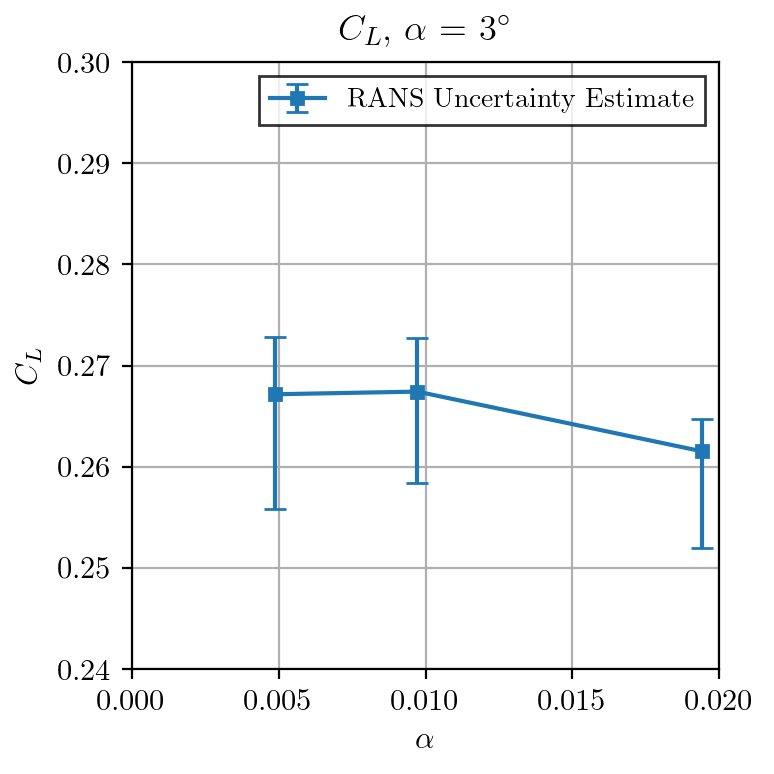

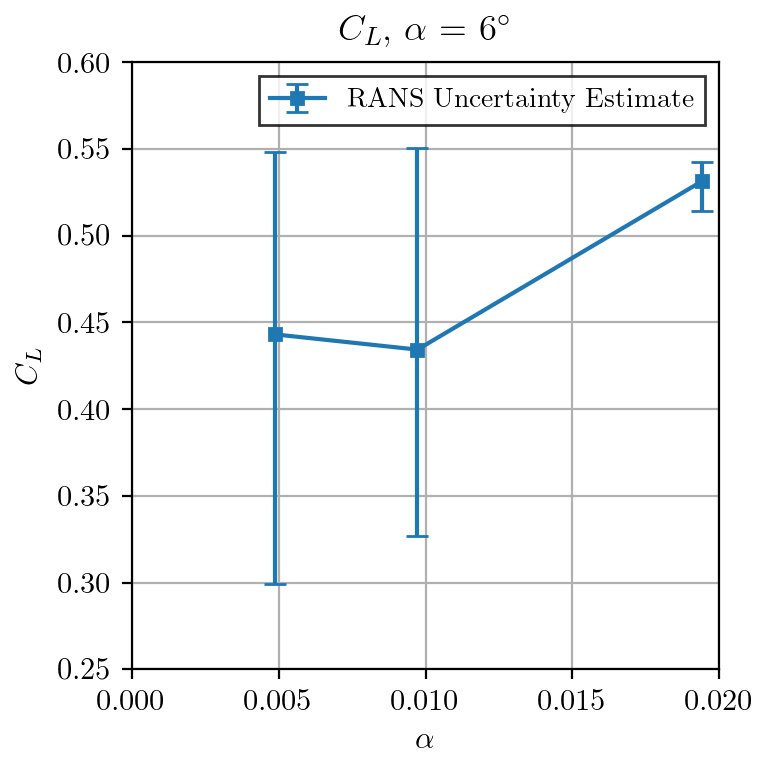

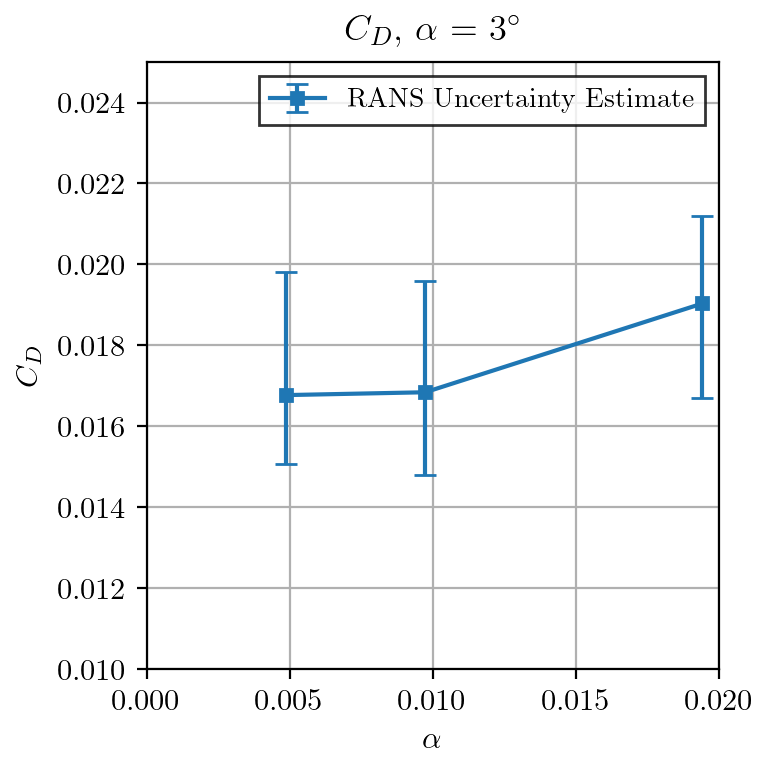

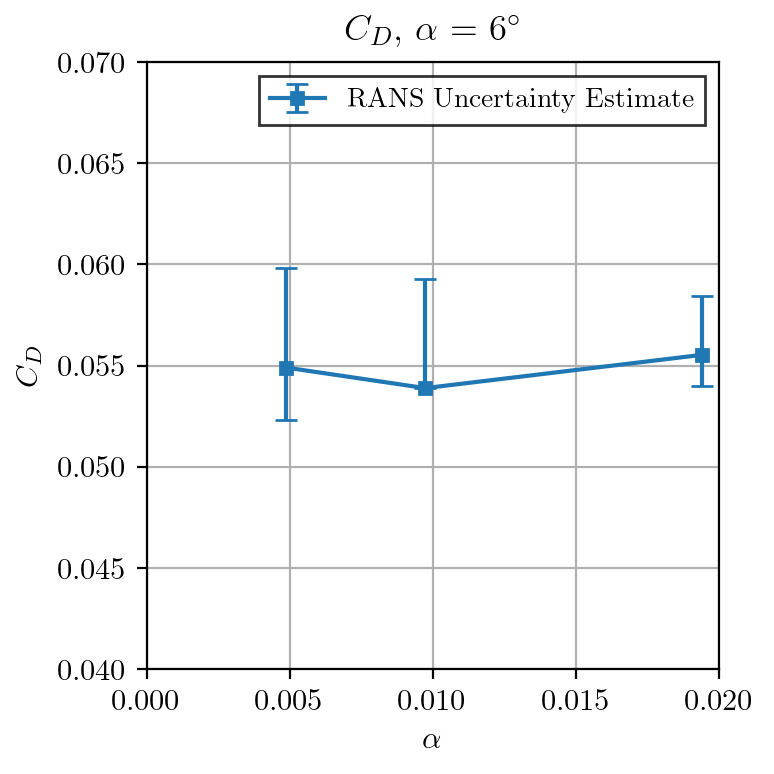

In [8]:
titles = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$ vs. $\alpha$'}
labels = {'naart':'NAART ','lst_nasa':'12 Ft LST NASA', 'usm3d_sst':'USM3D, SST','usm3d_sa':'USM3D, SA','Coarse':'SU2, SST Coarse', 'Medium_Coarse':'SU2, SST Medium-Coarse','Medium':'SU2, SST Medium','Fine':'SU2, SST Fine'}
ylabels = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$'}
shade_fill = {"." : "black","least_squares" : "red"}
coeffs = ["CL","CD"]
folders= ["03aoa", "06aoa"]
aoa_vals = np.array([float(i.split('aoa')[0]) for i in folders])

meshes= ["L4","L3","L2"]
ylims = {'CL': {'03aoa' : (0.24,0.30), '06aoa' : (0.25,0.6)},
         'CD': {'03aoa' : (0.01,0.025), '06aoa' : (0.04,0.07)}}
plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)
grads = ["."]



plt.figure(figsize=(5,5))
for coeff in coeffs:
    for aoa,aoa_folder in enumerate(folders):
        fn = 'data/oneram6_{}_{}_tmr_uq.csv'.format(aoa_folder,coeff)
        with open(fn) as f:
            header = f.readline()
        header = [h.strip() for h in header.split(',')]
        dtype=[]
        for var in header:
            dtype.append((var,np.float64))
        data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
            
        plt.figure(figsize = (4,4))
        yplus_err = np.reshape(data['max'] - data['baseline'],(1,3))
        ymin_err = np.reshape(data['baseline'] - data['min'],(1,3))
        y_err = np.append(ymin_err,yplus_err,axis = 0)
        print(y_err)
        print(np.reshape(data['h'],(1,3)))
        print(data['baseline'][0])
        plt.errorbar(data['h'],data['baseline'], yerr = y_err, marker='s',label="RANS Uncertainty Estimate")
        plt.xlabel(r'$\alpha$')
        plt.ylabel(ylabels[coeff])
        plt.title(titles[coeff] + r', $\alpha$ = ' + aoa_folder.strip('0aoa') + r'$^\circ$')
        plt.xlim((0,0.02))
        plt.ylim(ylims[coeff][aoa_folder])
        plt.tight_layout()
        plt.grid()
        plt.legend(frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False,fontsize=10)
        plt.savefig('images/'+coeff+'_'+aoa_folder+'.png')

[[0.00955205 0.00906631 0.01280283]
 [0.00321975 0.00528224 0.00411207]]
0.2686753339
0
{'Computed apparent order': array([2.25807329]), 'Relative fine-grid error': 0.004602765657900882, 'Extrapolated value': array([0.2690031]), 'Extrapolated relative fine-grid error': array([0.00121846]), 'Fine-grid convergence index': array([0.00152494]), 'Error Code': 0}
[[0.01694222 0.10722091 0.14374581]
 [0.01133561 0.11646233 0.10514716]]
0.4430431885
1
{'Computed apparent order': 'NA', 'Relative fine-grid error': 0.019821288596563152, 'Extrapolated value': 'NA', 'Extrapolated relative fine-grid error': 'NA', 'Fine-grid convergence index': 'NA', 'Fine-grid convergence index, Corrected': 0.6570740983189726, 'Error Code': 1}
[[0.002334   0.00203672 0.00120647]
 [0.00215106 0.00275919 0.00353168]]
0.01627342875
0
{'Computed apparent order': array([1.94698952]), 'Relative fine-grid error': 0.03503325505388649, 'Extrapolated value': array([0.01607327]), 'Extrapolated relative fine-grid error': array(

<Figure size 1000x1000 with 0 Axes>

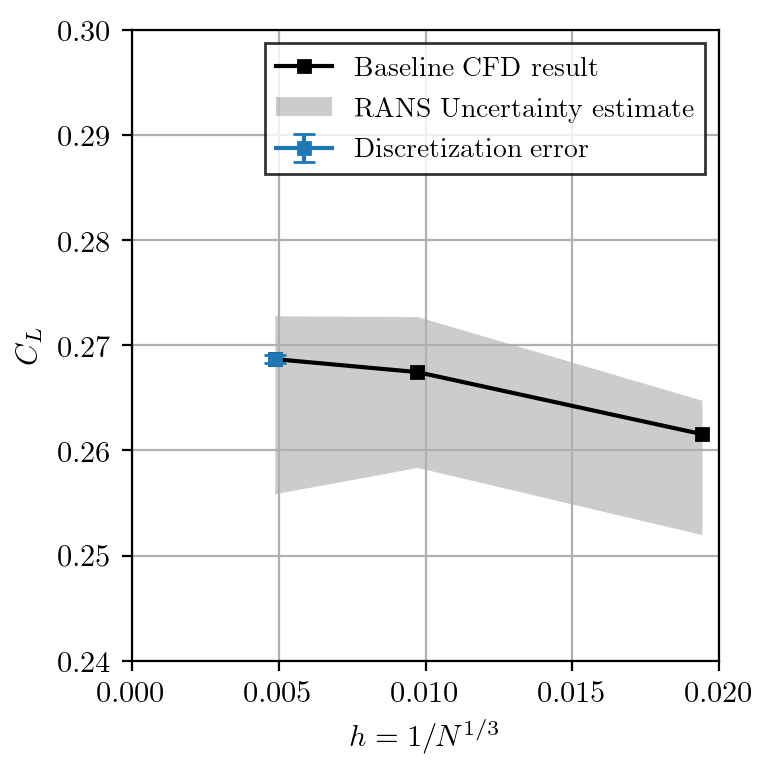

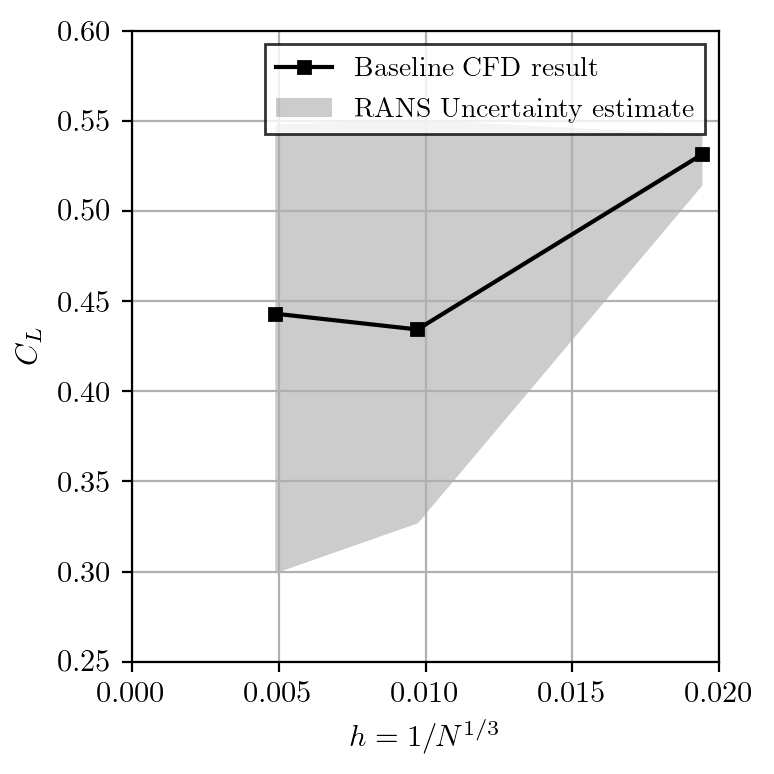

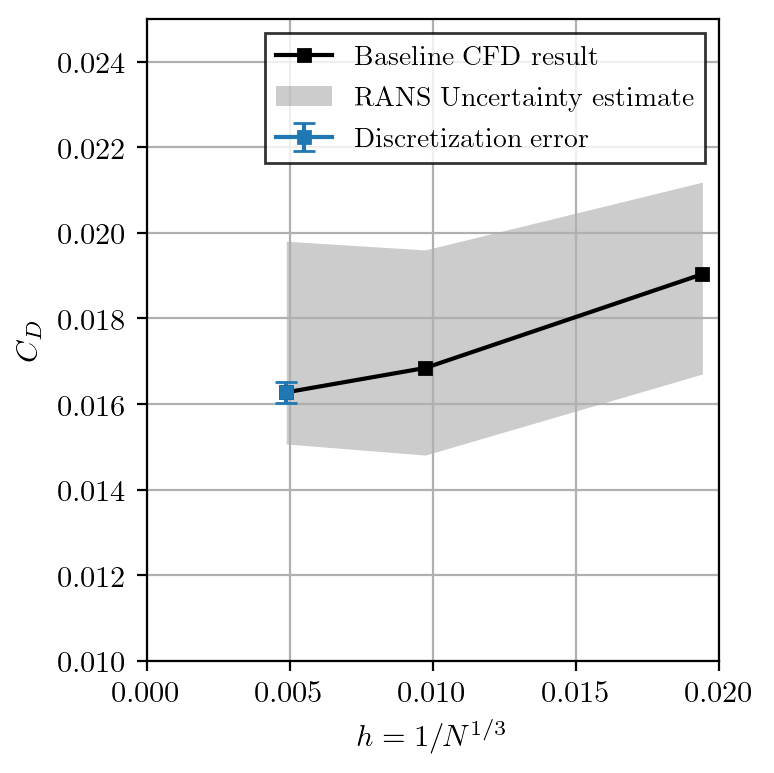

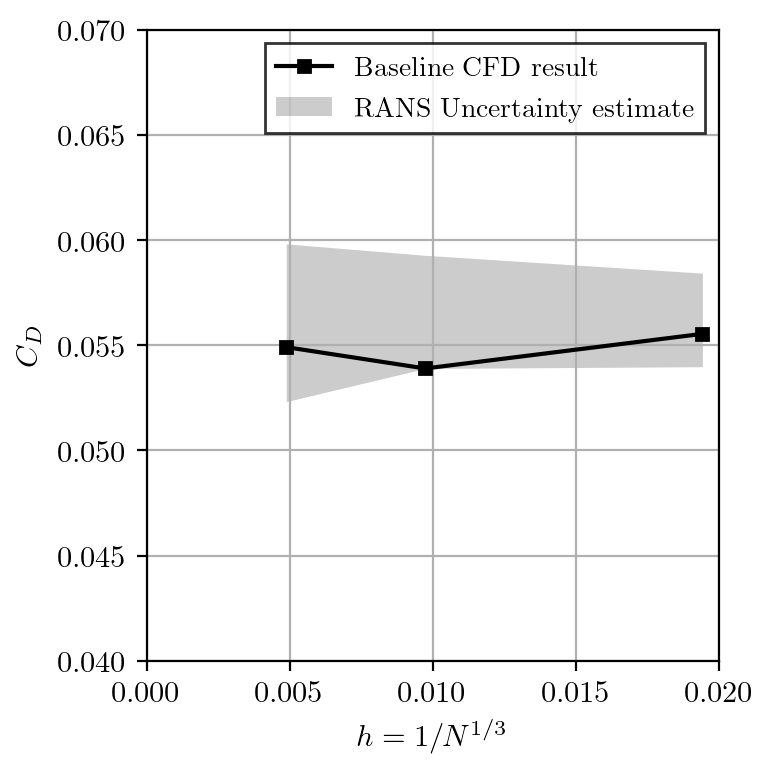

In [26]:
titles = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$ vs. $\alpha$'}
labels = {'naart':'NAART ','lst_nasa':'12 Ft LST NASA', 'usm3d_sst':'USM3D, SST','usm3d_sa':'USM3D, SA','Coarse':'SU2, SST Coarse', 'Medium_Coarse':'SU2, SST Medium-Coarse','Medium':'SU2, SST Medium','Fine':'SU2, SST Fine'}
ylabels = {'CL':r'$C_L$','CD':r'$C_D$','CMy':r'$C_m$'}
shade_fill = {"." : "black","least_squares" : "red"}
coeffs = ["CL","CD"]
folders= ["03aoa", "06aoa"]
aoa_vals = np.array([float(i.split('aoa')[0]) for i in folders])

meshes= ["L4","L3","L2"]
ylims = {'CL': {'03aoa' : (0.24,0.30), '06aoa' : (0.25,0.6)},
         'CD': {'03aoa' : (0.01,0.025), '06aoa' : (0.04,0.07)}}
plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)
grads = ["."]



plt.figure(figsize=(5,5))
for coeff in coeffs:
    for aoa,aoa_folder in enumerate(folders):
        fn = 'data/oneram6_{}_{}_tmr_uq.csv'.format(aoa_folder,coeff)
        with open(fn) as f:
            header = f.readline()
        header = [h.strip() for h in header.split(',')]
        dtype=[]
        for var in header:
            dtype.append((var,np.float64))
        data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
        
        if aoa_folder == '03aoa':
            if coeff == 'CL':
                data['baseline'][2] = data['baseline'][2] + 0.0015
            else:
                data['baseline'][2] = data['baseline'][2] - 0.0005
            
        
        plt.figure(figsize = (4,4))
        yplus_err = np.reshape(data['max'] - data['baseline'],(1,3))
        ymin_err = np.reshape(data['baseline'] - data['min'],(1,3))
        y_err = np.append(ymin_err,yplus_err,axis = 0)
        print(y_err)
#         print(np.reshape(data['h'],(1,3)))
        print(data['baseline'][2])
        
        phi1 = data['baseline'][2]
        phi2 = data['baseline'][1]
        phi3 = data['baseline'][0]
        
        print(aoa)
        error_dict = numerical_discretization_error((data['h'][2],data['h'][1],data['h'][0]),(phi1,phi2,phi3))
        print(error_dict)
        error = 0.0
        if error_dict['Error Code'] == 0.0:
            error = error_dict['Fine-grid convergence index'] * abs(phi1)
#         elif error_dict['Error Code'] == 1.0:
#             error = 0.0
#             oscillatory_points = np.append(oscillatory_points,[[aoa,phi1]],axis=0)
#         elif error_dict['Error Code'] == 2.0:
#             error = 0.0
#             negative_p = np.append(negative_p,[[aoa,phi1]],axis=0)
        else:
            error = error_dict['Fine-grid convergence index, Corrected'] * abs(phi1)
        
        plt.plot(data['h'],data['baseline'],color='k',marker='s',label='Baseline CFD result')
        if aoa_folder == '03aoa':
            plt.errorbar(data['h'][2],data['baseline'][2], yerr = error, marker='s',label="Discretization error")
        plt.fill_between(data['h'],data['max'],data['min'],color='k',alpha=0.2,lw=0, label="RANS Uncertainty estimate")
        plt.xlabel(r'$h=1/N^{1/3}$')
        plt.ylabel(ylabels[coeff])
#         plt.title(titles[coeff] + r', $\alpha$ = ' + aoa_folder.strip('0aoa') + r'$^\circ$')
        plt.xlim((0,0.02))
        plt.ylim(ylims[coeff][aoa_folder])
        plt.tight_layout()
        plt.grid()
        plt.legend(frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False,fontsize=10)
        plt.savefig('images/'+coeff+'_'+aoa_folder+'.png')